# non-linear regression

In [33]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt

In [34]:
df=pd.read_csv('https://raw.githubusercontent.com/jadijadi/machine_learning_with_python_jadi/refs/heads/main/china_gdp.csv')
df.head(10)
#df.tail(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


## Plotting dataset

<function matplotlib.pyplot.show(close=None, block=None)>

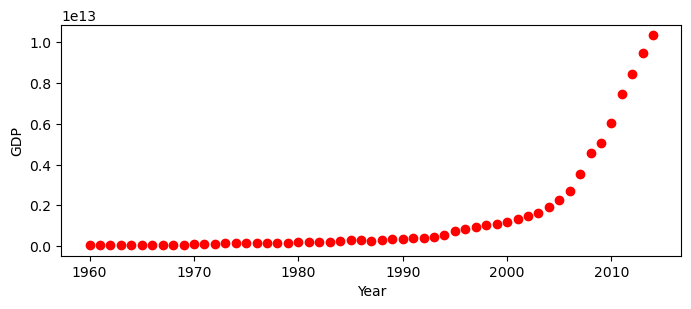

In [64]:
plt.figure(figsize=(8,3))
x_data, y_data= (df['Year'].values,df['Value'].values)
plt.plot(x_data,y_data,'ro')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show

## Choosing a model
The sigmoidal/logistic function could be a good approximation because GDP decreases at the end. The formula for the logistic function is the following: 
$$
\hat{Y} = \frac{1}{1 + e^{\beta_1(X-\beta_2)}}
$$




In [112]:
def sigmoid(x,Beta_1,Beta_2):
    y=1/(1+np.exp(-Beta_1*(x-Beta_2)))
    return y

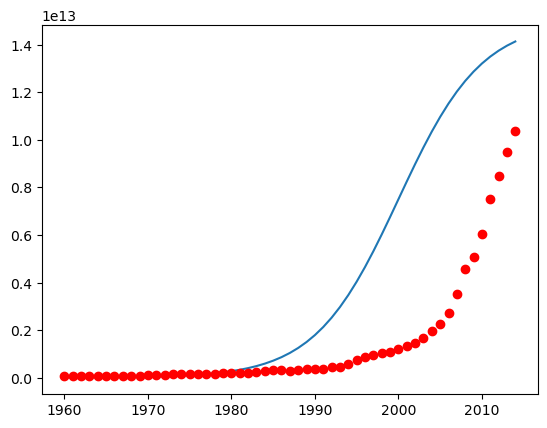

In [154]:
beta_1=0.2
beta_2=2000.0
Y_pred=sigmoid(x_data, beta_1, beta_2)

plt.plot(x_data, Y_pred*15000000000000)
plt.plot(x_data, y_data, 'ro')

In [158]:
# normalize data
xdata=x_data/max(x_data)
ydata=y_data/max(y_data)
xdata

array([0.97318769, 0.97368421, 0.97418073, 0.97467726, 0.97517378,
       0.97567031, 0.97616683, 0.97666336, 0.97715988, 0.97765641,
       0.97815293, 0.97864945, 0.97914598, 0.9796425 , 0.98013903,
       0.98063555, 0.98113208, 0.9816286 , 0.98212512, 0.98262165,
       0.98311817, 0.9836147 , 0.98411122, 0.98460775, 0.98510427,
       0.98560079, 0.98609732, 0.98659384, 0.98709037, 0.98758689,
       0.98808342, 0.98857994, 0.98907646, 0.98957299, 0.99006951,
       0.99056604, 0.99106256, 0.99155909, 0.99205561, 0.99255214,
       0.99304866, 0.99354518, 0.99404171, 0.99453823, 0.99503476,
       0.99553128, 0.99602781, 0.99652433, 0.99702085, 0.99751738,
       0.9980139 , 0.99851043, 0.99900695, 0.99950348, 1.        ])

## How we find the best parameters for our fit line?

In [161]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)

print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))


 beta_1 = 690.451712, beta_2 = 0.997207


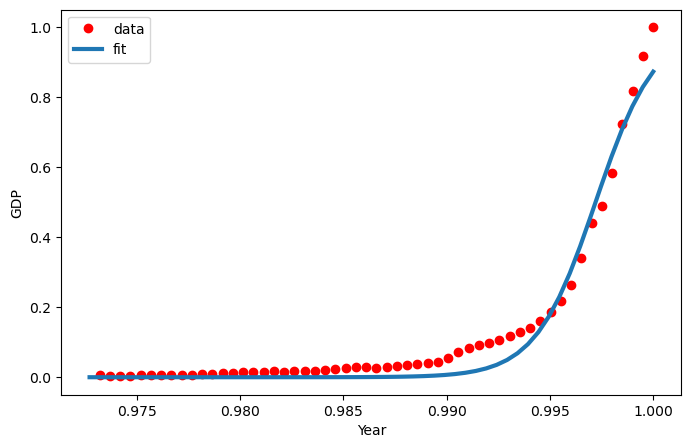

In [163]:
x = np.linspace(1960, 2015, 55)
x = x/max(x)
plt.figure(figsize=(8,5))
y = sigmoid(x, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(x,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [171]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(ydata,y)
r2 = r2_score(ydata,y)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

Mean Squared Error: 0.00
R^2 Score: 0.97
